## Day_35 : Assignment - CNN

* Loading Images Dataset and Resizing in 100x100

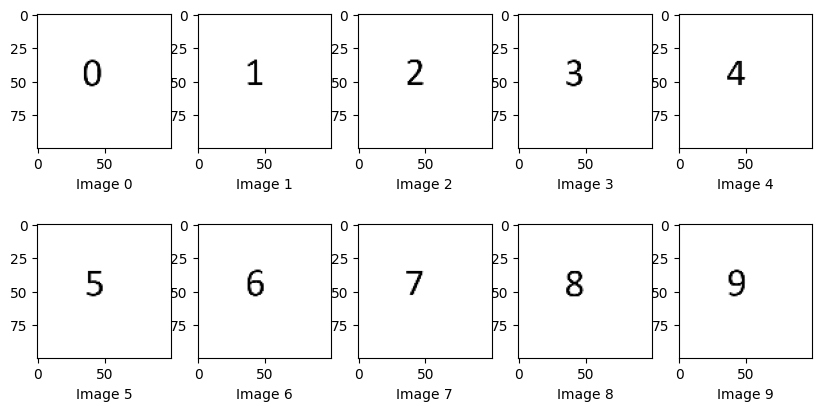

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 21.9170 - accuracy: 0.0000e+00 - val_loss: 232.5612 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 354ms/step - loss: 14.2846 - accuracy: 0.2000 - val_loss: 367.9955 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 328ms/step - loss: 45.1560 - accuracy: 0.2000 - val_loss: 377.3262 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 294ms/step - loss: 76.0580 - accuracy: 0.4000 - val_loss: 245.1318 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 62ms/step - loss: 127.7078 - accuracy: 0.0000e+00
Test loss: 127.7077865600586
Test accuracy: 0.0


In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Load images
photos = []
for i in range(10):
    img_path = "{}{}.png".format("Numbers_data/", i)
    img = load_img(img_path, target_size=(100, 100), color_mode="grayscale") 
    img_array = img_to_array(img)
    photos.append(img_array)
    
photos = np.asarray(photos)

# Visualize
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(photos[i].reshape(100, 100), cmap='gray')
    plt.xlabel(f"Image {i}")
plt.show()

# Create dataset
X_train = photos[:7]
X_test = photos[7:] 

y_train = np.arange(7)
y_test = np.arange(7, 10)

# Split into train, val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Input layer
input_layer = tf.keras.layers.Input(shape=(100, 100, 1))

# CNN model 
model = tf.keras.Sequential([
  input_layer,
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
   
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          epochs=5, 
          batch_size=X_train.shape[0],
          validation_data=(X_val, y_val))

# Evaluate 
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}") 



In [30]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (100, 100, 1)
img = img.reshape((100, 100, 1))
print(img.shape)

# predict the image
predictions = model.predict(img.reshape(1, 100, 100, 1))
print(predictions)

# Save the model to be used later
model.save('models_saved/my_model.h5')

(100, 100, 1)
(100, 100, 1)
1/1 [==============================] - 0s 196ms/step
[[0.0000000e+00 0.0000000e+00 1.6054645e-12 2.6066235e-26 3.1691400e-25
  2.7831879e-24 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


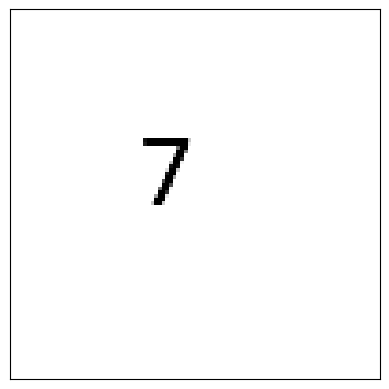

In [31]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [32]:
print(predictions[:,7])

[0.]


In [33]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 6.


--------------------------------

In [34]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 5 images in the training set and 3 images in the test set.
The size of the images is (100, 100, 1).


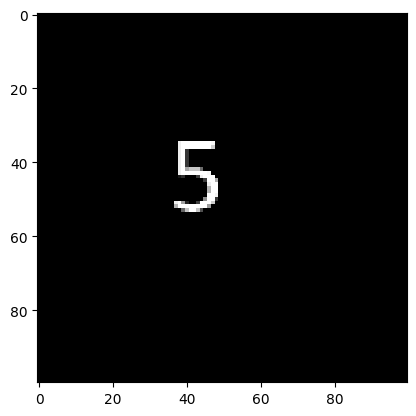

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [36]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 conv2d_57 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                               